In [ ]:
from google.colab import drive
import zipfile
import pandas as pd
import os
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.transform import resize
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from google.colab import drive
import numpy as np
import itertools
from tensorflow.keras.models import load_model
import keras
import csv
from PIL import Image
from keras import backend as K
from tensorflow.keras.utils import plot_model
from tensorflow.keras.applications import VGG16


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/FYP/FINAL_SIGNS_PROCESSED.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/FYP/FINAL_4_TRAIN.csv")
test_df = pd.read_csv("/content/drive/MyDrive/FYP/FINAL_4_TEST.csv")


In [ ]:
train_df.columns = ["GENUINE1", "GENUINE2", "GENUINE3", "GENUINE4", "TEST", "OUTCOME", "SET"]
test_df.columns = ["GENUINE1", "GENUINE2", "GENUINE3", "GENUINE4", "TEST", "OUTCOME", "SET"]

In [ ]:
train_df

,GENUINE1,GENUINE2,GENUINE3,GENUINE4,TEST,OUTCOME,SET
0,001_01.PNG,001_02.PNG,001_03.PNG,001_04.PNG,001_06.PNG,1,Train
1,001_01.PNG,001_02.PNG,001_03.PNG,001_04.PNG,001_07.PNG,1,Train
2,001_01.PNG,001_02.PNG,001_03.PNG,001_04.PNG,001_08.PNG,1,Train
3,001_01.PNG,001_02.PNG,001_03.PNG,001_04.PNG,001_09.PNG,1,Train
4,001_01.PNG,001_02.PNG,001_03.PNG,001_04.PNG,001_10.PNG,1,Train
...,...,...,...,...,...,...,...
959,01_048.png,02_048.png,03_048.png,04_048.png,02_0204048.PNG,0,Train
960,01_048.png,02_048.png,03_048.png,04_048.png,03_0106048.PNG,0,Train
961,01_048.png,02_048.png,03_048.png,04_048.png,03_0204048.PNG,0,Train
962,01_048.png,02_048.png,03_048.png,04_048.png,04_0106048.PNG,0,Train


In [ ]:
SIGN_PATH = "/content/FINAL_SIGNS/"

In [ ]:
x_train_list=[]
with open('/content/drive/MyDrive/FYP/FINAL_4_TRAIN.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
       img1 = plt.imread(SIGN_PATH + row[0])
       img1=resize(img1,(118,118,3))
       x_train_list.append(img1)
       img2 = plt.imread(SIGN_PATH + row[1])
       img2=resize(img2,(118,118,3))
       x_train_list.append(img2)
       img3 = plt.imread(SIGN_PATH + row[2])
       img3=resize(img3,(118,118,3))
       x_train_list.append(img3)
       img4 = plt.imread(SIGN_PATH + row[3])
       img4=resize(img4,(118,118,3))
       x_train_list.append(img4)
       img5 = plt.imread(SIGN_PATH + row[4])
       img5=resize(img5,(118,118,3))
       x_train_list.append(img5)

print("X Train list:", x_train_list)
x_train_arr = np.array(x_train_list)
print("X TRAIN array:", x_train_arr)
x_train_arr.shape

X Train list: 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



X TRAIN array: [[[[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.  

(4825, 118, 118, 3)

In [ ]:
y_train_list=[]
with open('/content/drive/MyDrive/FYP/FINAL_4_TRAIN.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        y_train_list.append(row[5])
print("Y Train list:", y_train_list)
y_train_arr = np.array(y_train_list)
print("Y TRAIN array:", y_train_arr)
y_train_arr.shape

Y Train list: ['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', 

(965,)

In [ ]:
x_test_list=[]
with open('/content/drive/MyDrive/FYP/FINAL_4_TEST.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        img1 = plt.imread(SIGN_PATH + row[0])
        img1=resize(img1,(118,118,3))
        x_test_list.append(img1)
        img2 = plt.imread(SIGN_PATH + row[1])
        img2=resize(img2,(118,118,3))
        x_test_list.append(img2)
        img3 = plt.imread(SIGN_PATH + row[2])
        img3=resize(img3,(118,118,3))
        x_test_list.append(img3)
        img4 = plt.imread(SIGN_PATH + row[3])
        img4=resize(img4,(118,118,3))
        x_test_list.append(img4)
        img5 = plt.imread(SIGN_PATH + row[4])
        img5=resize(img5,(118,118,3))
        x_test_list.append(img5)

print("X TEST list:", x_test_list)
x_test_arr = np.array(x_test_list)
print("X TEST array:", x_test_arr)
x_test_arr.shape

Streaming output truncated to the last 5000 lines.
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.8724339 , 0.8724339 , 0.8724339 ],
        [0.3269243 , 0.3269243 , 0.3269243 ],
        [0.5491247 , 0.5491247 , 0.5491247 ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.39534584, 0.39534584, 0.39534584],
        [0.5032821 , 0.5032821 , 0.5032821 ],
        [0.9514674 , 0.9514674 , 0.9514674 ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.      

(2080, 118, 118, 3)

In [ ]:
y_test_list=[]
with open('/content/drive/MyDrive/FYP/FINAL_4_TEST.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        y_test_list.append(row[5])
print("Y TEST list:", y_test_list)
y_test_arr = np.array(y_test_list)
print("Y TEST array:", y_test_arr)
y_test_arr.shape

Y TEST list: ['1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '

(416,)

In [ ]:
def euclidean_distance(vectors):
    x, y = vectors
    sum_square = tf.reduce_sum(tf.square(x - y), axis=1, keepdims=True)
    return tf.sqrt(tf.maximum(sum_square, K.epsilon()))

In [ ]:
def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)

94765736/94765736 [==============================] - 3s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 one_input (InputLayer)         [(None, 118, 118, 3  0           []                               
                                )]                                                                
                                                                                                  
 two_input (InputLayer)         [(None, 118, 118, 3  0           []                               
                                )]                                                                
                                                                                                  
 three_input (InputLayer)       [(None, 118, 118, 3  0           []                               
                             

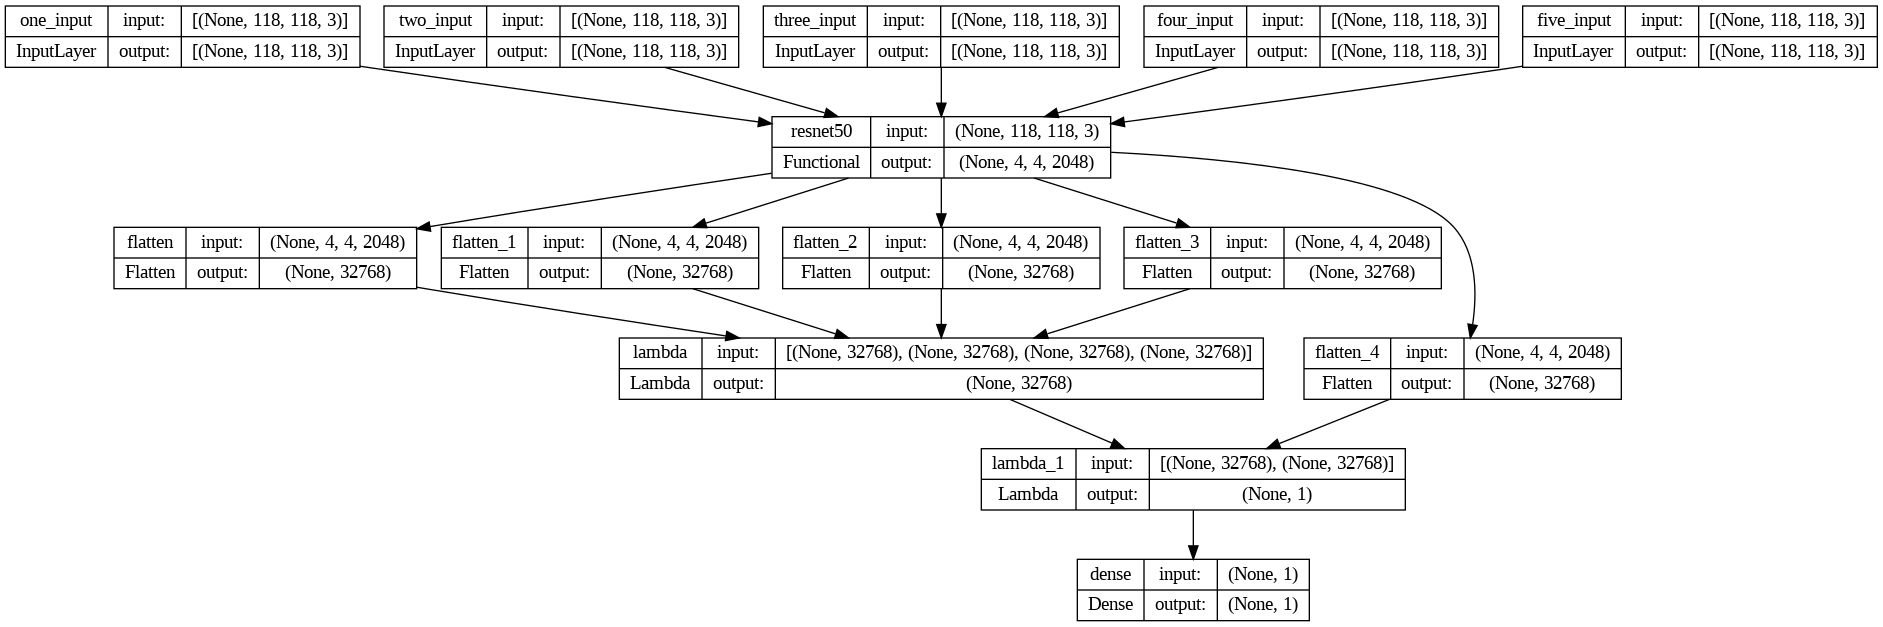

In [ ]:
from tensorflow.keras.layers import Input, Flatten, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50
import tensorflow as tf

def create_model(input_shape):
    Depth = 64

    # Load the ResNet50 model without the top classification layers
    resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

    # Freeze the pre-trained weights so they are not updated during training
    for layer in resnet_base.layers:
        layer.trainable = False

    # Create the multiple input branches
    one_input = Input(shape=input_shape, name='one_input')
    one_branch = resnet_base(one_input)
    one_output = Flatten()(one_branch)

    two_input = Input(shape=input_shape, name='two_input')
    two_branch = resnet_base(two_input)
    two_output = Flatten()(two_branch)

    three_input = Input(shape=input_shape, name='three_input')
    three_branch = resnet_base(three_input)
    three_output = Flatten()(three_branch)

    four_input = Input(shape=input_shape, name='four_input')
    four_branch = resnet_base(four_input)
    four_output = Flatten()(four_branch)

    five_input = Input(shape=input_shape, name='five_input')
    five_branch = resnet_base(five_input)
    five_output = Flatten()(five_branch)

    # Compute the average of the output branches
    average = Lambda(lambda x: tf.reduce_mean(x, axis=0))([one_output, two_output, three_output, four_output])

    # Compute the distance between the average and the fifth output branch
    distance = Lambda(euclidean_distance, output_shape=eucl_dist_output_shape)([average, five_output])

    dense = Dense(1, activation='relu')(distance)
   #output = Dense(1, activation='sigmoid', name='output')(dense)

    # Create the final model
    model = Model(inputs=[one_input, two_input, three_input, four_input, five_input], outputs=[dense])

    return model

# Define the input shape
input_shape = (118, 118, 3)

# Create the model
model = create_model(input_shape)

# Print the model summary
model.summary()

# Plot the model architecture
plot_model(model, to_file='modelres.png', show_shapes=True)


In [ ]:
def MakePairs(X, Y):
    X_pairs, Y_pairs = [], []
    pair_count = 0
    for i in range(0, len(X) - 4, 5):
        image_A = X[i]
        image_B = X[i + 1]
        image_C = X[i + 2]
        image_D = X[i + 3]
        image_E = X[i + 4]
        X_pairs.append([image_A, image_B, image_C, image_D, image_E])
        pair_count += 1
        """
        plt.figure()
        plt.subplot(151)
        plt.imshow(image_A)
        plt.title('Image A')
        plt.subplot(152)
        plt.imshow(image_B)
        plt.title('Image B')
        plt.subplot(153)
        plt.imshow(image_C)
        plt.title('Image C')
        plt.subplot(154)
        plt.imshow(image_D)
        plt.title('Image D')
        plt.subplot(155)
        plt.imshow(image_E)
        plt.title('Image E')
        plt.show()
        """
    for j in range(0, len(X_pairs)):
        Y_pairs.append(Y[j])
    X_pairs = np.array(X_pairs)
    Y_pairs = np.array(Y_pairs)
    print(f'Total pairs made: {pair_count}')
    return X_pairs, Y_pairs


In [ ]:
X_train_pairs,Y_train_pairs=MakePairs(x_train_arr,y_train_arr)
X_train_pairs.shape,Y_train_pairs.shape
Y_train_pairs=Y_train_pairs.astype(float)
X_train_pairs.shape,Y_train_pairs.shape

Total pairs made: 965


((965, 5, 118, 118, 3), (965,))

In [ ]:
X_test_pairs,Y_test_pairs=MakePairs(x_test_arr, y_test_arr)
X_test_pairs.shape,Y_test_pairs.shape
Y_test_pairs=Y_test_pairs.astype(float)
X_test_pairs.shape,Y_test_pairs.shape

Total pairs made: 416


((416, 5, 118, 118, 3), (416,))

In [ ]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Define the contrastive loss function
def contrastive_loss(y_true, y_pred):
    margin = 1
    return tf.reduce_mean(y_true * tf.square(y_pred) + (1 - y_true) * tf.square(tf.maximum(margin - y_pred, 0)))


In [ ]:
optimizer = RMSprop(learning_rate=1e-3, rho=0.9, epsilon=1e-08)

In [ ]:
model.compile(loss=contrastive_loss, optimizer=optimizer)

In [ ]:
callbacks = [
    EarlyStopping(patience=12, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.000001, verbose=1),
    ModelCheckpoint('/content/drive/MyDrive/FYP/RESNET_UPD/siamese-sigcom-{epoch:03d}.h5', verbose=1, save_weights_only=True)
]

In [ ]:
history = model.fit(
    [X_train_pairs[:, 0, :, :, :], X_train_pairs[:, 1, :, :, :], X_train_pairs[:, 2, :, :, :], X_train_pairs[:, 3, :, :, :], X_train_pairs[:, 4, :, :, :]],
    Y_train_pairs,
    validation_data=(
        [X_test_pairs[:, 0, :, :, :], X_test_pairs[:, 1, :, :, :], X_test_pairs[:, 2, :, :, :], X_test_pairs[:, 3, :, :, :], X_test_pairs[:, 4, :, :, :]],
        Y_test_pairs
    ),
    epochs=1000,
    batch_size=10,
    callbacks=callbacks
)

Epoch 1/1000
97/97 [==============================] - ETA: 0s - loss: 111.0985
Epoch 1: saving model to /content/drive/MyDrive/FYP/RESNET_UPD/siamese-sigcom-001.h5
97/97 [==============================] - 30s 157ms/step - loss: 111.0985 - val_loss: 58.4005 - lr: 0.0010
Epoch 2/1000
97/97 [==============================] - ETA: 0s - loss: 81.4797
Epoch 2: saving model to /content/drive/MyDrive/FYP/RESNET_UPD/siamese-sigcom-002.h5
97/97 [==============================] - 11s 113ms/step - loss: 81.4797 - val_loss: 41.5561 - lr: 0.0010
Epoch 3/1000
97/97 [==============================] - ETA: 0s - loss: 56.4438
Epoch 3: saving model to /content/drive/MyDrive/FYP/RESNET_UPD/siamese-sigcom-003.h5
97/97 [==============================] - 11s 114ms/step - loss: 56.4438 - val_loss: 27.4352 - lr: 0.0010
Epoch 4/1000
97/97 [==============================] - ETA: 0s - loss: 35.9821
Epoch 4: saving model to /content/drive/MyDrive/FYP/RESNET_UPD/siamese-sigcom-004.h5
97/97 [========================

In [ ]:
model.load_weights('/content/drive/MyDrive/FYP/RESNET_UPD/siamese-sigcom-034.h5')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def compute_accuracy(predictions, labels, thresholds):
    predictions_arr=np.array(predictions)
    num_pairs = len(labels)-1
    num_images_per_pair = 5

    nsame = np.sum(labels == 1)
    ndiff = np.sum(labels == 0)

    labels = np.repeat(labels, num_images_per_pair)

    accuracies = []
    if isinstance(thresholds, list):
        for threshold in thresholds:
            idx1 = predictions_arr > threshold
            idx2 = predictions_arr <= threshold

            tp = 0
            fn = 0
            fp = 0
            tn = 0

            for i in range(num_pairs):
                pair_start = i * num_images_per_pair
                pair_end = (i + 1) * num_images_per_pair

                if np.all(labels[pair_start:pair_end] == 1):
                    tp += np.sum(idx1[pair_start:pair_end])
                    fn += np.sum(idx2[pair_start:pair_end])
                else:
                    fp += np.sum(idx1[pair_start:pair_end])
                    tn += np.sum(idx2[pair_start:pair_end])

            accuracy = float(tp + tn) / (tp + tn + fp + fn)
            accuracies.append(accuracy)
    else:
        threshold = thresholds
        idx1 = predictions_arr > threshold
        idx2 = predictions_arr <= threshold

        tp = 0
        fn = 0
        fp = 0
        tn = 0

        for i in range(num_pairs):
            pair_start = i * num_images_per_pair
            pair_end = (i + 1) * num_images_per_pair

            if np.all(labels[pair_start:pair_end] == 1):
                tp += np.sum(idx1[pair_start:pair_end])
                fn += np.sum(idx2[pair_start:pair_end])
            else:
                fp += np.sum(idx1[pair_start:pair_end])
                tn += np.sum(idx2[pair_start:pair_end])

        accuracy = float(tp + tn) / (tp + tn + fp + fn)
        accuracies.append(accuracy)

    return accuracies

In [ ]:
import numpy as np

def compute_accuracy(predictions, labels, thresholds):
    num_pairs = len(labels)-1
    num_images_per_pair = 5

    labels = np.repeat(labels, num_images_per_pair)

    accuracies = []
    for threshold in thresholds:
        correct_predictions = 0
        for i in range(num_pairs):
            pair_start = i * num_images_per_pair
            pair_end = (i + 1) * num_images_per_pair
            pair_labels = labels[pair_start:pair_end]
            pair_predictions = predictions[i]

            if np.all(pair_labels == 1) and np.any(pair_predictions <= threshold):
                correct_predictions += 1
            elif np.all(pair_labels == 0) and np.any(pair_predictions >= threshold):
                correct_predictions += 1

        accuracy = correct_predictions / num_pairs
        accuracies.append(accuracy)

    return accuracies


In [ ]:
difference_arr=[]
for i in range(len(X_test_pairs)-1):
  im=i
  img_A = imread(os.path.join(SIGN_PATH, test_df["GENUINE1"][im]))
  img_B = imread(os.path.join(SIGN_PATH, test_df["GENUINE2"][im]))
  img_C = imread(os.path.join(SIGN_PATH, test_df["GENUINE3"][im]))
  img_D = imread(os.path.join(SIGN_PATH, test_df["GENUINE4"][im]))
  img_E = imread(os.path.join(SIGN_PATH, test_df["TEST"][im]))
  label_A = y_test_arr[im]
  label_B = y_test_arr[im]
  label_C = y_test_arr[im]
  label_D = y_test_arr[im]
  label_E = y_test_arr[im]
  img_A = resize(img_A, (118, 118, 3))
  img_B = resize(img_B, (118, 118, 3))
  img_C = resize(img_C, (118, 118, 3))
  img_D = resize(img_D, (118, 118, 3))
  img_E = resize(img_E, (118, 118, 3))
  result = model.predict([img_A.reshape((1, 118, 118, 3)),
                        img_B.reshape((1, 118, 118, 3)),
                        img_C.reshape((1, 118, 118, 3)),
                        img_D.reshape((1, 118, 118, 3)),
                        img_E.reshape((1, 118, 118, 3))])
  difference_arr.append(result[0][0])








1/1 [==============================] - 0s 59ms/step


In [ ]:
for i in range(len(X_test_pairs)-1):
  print("difference between pair ", i, "is ",difference_arr[i]," and label is =", y_test_arr[i])

difference between pair  0 is  0.68195415  and label is = 1
difference between pair  1 is  0.60042757  and label is = 1
difference between pair  2 is  0.60810566  and label is = 1
difference between pair  3 is  0.57122487  and label is = 1
difference between pair  4 is  0.5118988  and label is = 1
difference between pair  5 is  0.45426327  and label is = 1
difference between pair  6 is  0.7042679  and label is = 1
difference between pair  7 is  0.9510759  and label is = 1
difference between pair  8 is  0.51775414  and label is = 0
difference between pair  9 is  1.154558  and label is = 0
difference between pair  10 is  1.1266965  and label is = 0
difference between pair  11 is  0.46331316  and label is = 0
difference between pair  12 is  0.665931  and label is = 0
difference between pair  13 is  0.95670474  and label is = 0
difference between pair  14 is  0.49842197  and label is = 0
difference between pair  15 is  0.55426174  and label is = 0
difference between pair  16 is  0.9844724 

13/13 [==============================] - 3s 144ms/step
at threshold  0.1 accuracy =  0.5927710843373494
at threshold  0.15 accuracy =  0.5951807228915663
at threshold  0.2 accuracy =  0.6
at threshold  0.23 accuracy =  0.6096385542168675
at threshold  0.25 accuracy =  0.6120481927710844
at threshold  0.3 accuracy =  0.6337349397590362
at threshold  0.35 accuracy =  0.6602409638554216
at threshold  0.4 accuracy =  0.7060240963855422
at threshold  0.42 accuracy =  0.7012048192771084
at threshold  0.45 accuracy =  0.7108433734939759
at threshold  0.47354182600975037 accuracy =  0.7060240963855422
at threshold  0.475 accuracy =  0.708433734939759
at threshold  0.48 accuracy =  0.7132530120481928
at threshold  0.489 accuracy =  0.7012048192771084
at threshold  0.5 accuracy =  0.7012048192771084
at threshold  0.51 accuracy =  0.6963855421686747
at threshold  0.52 accuracy =  0.7036144578313253
at threshold  0.535 accuracy =  0.6987951807228916
at threshold  0.55 accuracy =  0.698795180722891

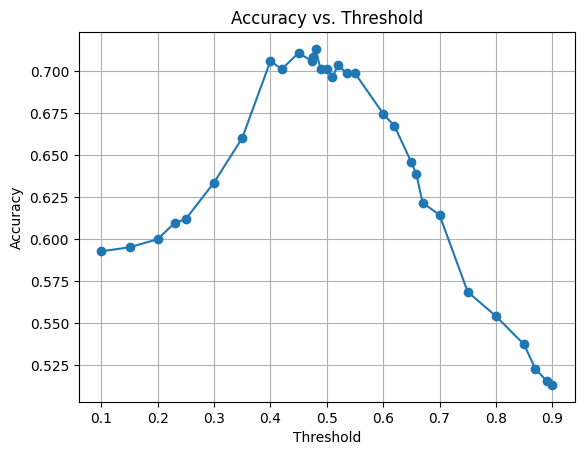

In [ ]:

predicted_distances = model.predict([X_test_pairs[:, 0, :, :, :], X_test_pairs[:, 1, :, :, :], X_test_pairs[:, 2, :, :, :], X_test_pairs[:, 3, :, :, :], X_test_pairs[:, 4, :, :, :]])
"""
thresholds = [0.10,0.15,0.20,0.23,0.25,0.30,0.35,0.40,0.42,0.45,0.47354182600975037
,0.50,0.51,0.52,0.535,0.55,0.60,0.65,0.67,0.70,0.75,0.80,0.85,0.87,0.89,0.90]
"""
thresholds = [0.10,0.15,0.20,0.23,0.25,0.30,0.35,0.40,0.42,0.45,0.47354182600975037,0.475,0.48,0.489
,0.50,0.51,0.52,0.535,0.55,0.60,0.62,0.65,0.659,0.67,0.70,0.75,0.80,0.85,0.87,0.89,0.90]

labels=Y_test_pairs
accuracies = compute_accuracy(difference_arr, labels, thresholds)
for i in range(len(thresholds)):
  print("at threshold ",thresholds[i],"accuracy = ",accuracies[i])
plt.plot(thresholds, accuracies, marker='o')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Threshold')
plt.grid(True)
plt.show()


In [ ]:
im=87
img_A = imread(os.path.join(SIGN_PATH, test_df["GENUINE1"][im]))
img_B = imread(os.path.join(SIGN_PATH, test_df["GENUINE2"][im]))
img_C = imread(os.path.join(SIGN_PATH, test_df["GENUINE3"][im]))
img_D = imread(os.path.join(SIGN_PATH, test_df["GENUINE4"][im]))
img_E = imread(os.path.join(SIGN_PATH, test_df["TEST"][im]))

label_A = y_test_arr[im]
label_B = y_test_arr[im]
label_C = y_test_arr[im]
label_D = y_test_arr[im]
label_E = y_test_arr[im]

img_A = resize(img_A, (118, 118, 3))
img_B = resize(img_B, (118, 118, 3))
img_C = resize(img_C, (118, 118, 3))
img_D = resize(img_D, (118, 118, 3))
img_E = resize(img_E, (118, 118, 3))


In [ ]:
threshold1=0.48

In [ ]:
import numpy as np

def compute_accuracy_custom(distanc_accs, labels):
  tn=0
  fn=0
  tp=0
  fp=0
  print(distanc_accs)
  print(labels)
  finalacc=0
  for i in range(len(labels)-1):
    if distanc_accs[i]==int(labels[i]):
      finalacc=finalacc+1
    if distanc_accs[i]== 0 and int(labels[i])==0:
      tn=tn+1
    elif distanc_accs[i]==1 and int(labels[i])==1:
      tp=tp+1
    elif distanc_accs[i]==1 and int(labels[i])==0:
      fp=fp+1
    elif distanc_accs[i]==0 and int(labels[i])==1:
      fn=fn+1
  finalacc/=len(labels)
  print("final accuracy is ", finalacc)
  print("TRUE POSITIVE RATE = ", tp)
  print("TRUE NEGATIVE RATE = ", tn)
  print("FALSE POSITIVE RATE = ", fp)
  print("FALSE NEGATIVE RATE = ", fn)
  return finalacc

In [ ]:
final_acc=[]
for i in range (len(y_test_arr)-1):
  if difference_arr[i]>=threshold1:
    final_acc.append(0)
  elif difference_arr[i]<threshold1:
    final_acc.append(1)
final_acc_arr=np.array(final_acc)
print(final_acc_arr)
print(y_test_arr)
print(len(final_acc_arr))
print(len(y_test_arr))

[0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0
 0 0 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0
 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0
 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0
 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1
 1 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0]
['1' '1' '1' '1' '1' '1' '1' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '1' '1' '1' '1' '1' '1' '1' '1' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0

In [ ]:
compute_accuracy_custom(final_acc_arr,y_test_arr)

[0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0
 0 0 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0
 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0
 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0
 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1
 1 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0]
['1' '1' '1' '1' '1' '1' '1' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '1' '1' '1' '1' '1' '1' '1' '1' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0

0.7115384615384616

In [ ]:
result = model.predict([img_A.reshape((1, 118, 118, 3)),
                        img_B.reshape((1, 118, 118, 3)),
                        img_C.reshape((1, 118, 118, 3)),
                        img_D.reshape((1, 118, 118, 3)),
                        img_E.reshape((1, 118, 118, 3))])

difference=result[0][0]
if difference > threshold1:
  print("Its a Forged Signature")
else:
  print("Its a Genuine Signature")
difference


1/1 [==============================] - 0s 73ms/step
Its a Forged Signature


0.6156596